In [5]:
import easyocr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


   Column_2 Column_3  Column_4 Column_5   Column_6   Column_7 Column_8  \
0      D154     S123     Shirt   Credit       card  Abandoned   525,00   
1      D155     5345     Shirt   Paypal  Completed     525,00    07.05   
2      D156     S367  Donation     Cash  Completed     S50,00    07.05   
3      D157     5121     Shirt    Paypa     Failed     525,00    07.05   
4      D158     S112  Donation   Credit       card  Completed   S75,00   
5      D159     5055  Donation   Credit       card  Completed  5100,00   
6      D160     5089  Donation    Paypa  Completed     S60,00    13.05   
7      D161     S523     Shirt   Credit       card     Failed   525,00   
8      D162     5123     Shirt     Cash  Completed     525,00    17.05   
9      D163     S165  Donation   Paypab  Abandoned     535,00    17.05   
10     D164     5094  Donation   Paypal  Completed     575,00    21.05   
11     D165     S054  Donation   Credit       card  Completed   S50,00   
12     D166     5031     Shirt   Credi

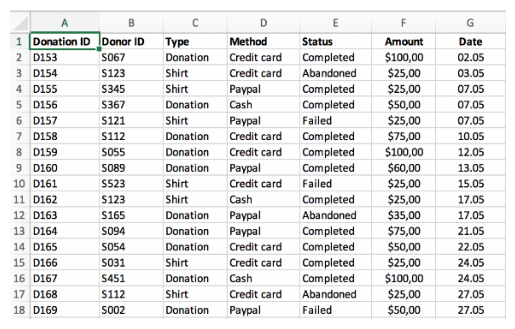

In [6]:

# Load the image
image_path = r"Screenshot 2024-03-24 181957.png"
# Create an OCR reader object
reader = easyocr.Reader(['en'])  # Specify languages to use (e.g., English)

# Perform OCR on the image
result = reader.readtext(image_path)

# Extract text and calculate spaces
text_with_spaces = []
last_bottom = 0
line_number = 1
for detection in result:
    left, top = detection[0][0]
    right, bottom = detection[0][2]
    detected_text = detection[1]
    # Check if current text is on a new line compared to the previous text
    if top > last_bottom:
        # Append newline and line number
        text_with_spaces.append(f'\nline({line_number}) ')
        line_number += 1
    last_bottom = bottom
    text_with_spaces.append(detected_text)
    text_with_spaces.append(' ')

# Combine text segments with spaces
result_with_spaces = ''.join(text_with_spaces)

# Print the result
# print(result_with_spaces)
# Split the text into lines
lines = result_with_spaces.strip().split("\n")

# Initialize lists to store data
data = []
columns = 0

# Process each line
for line in lines[2:]:
    # Remove "line()" and leading/trailing whitespaces
    line = line.replace("line()", "").strip()
    # Split the line by space
    entries = line.split()
    # Update columns if necessary
    columns = max(columns, len(entries))
    # Add entries to data
    data.append(entries)

# Fill empty entries with NaN
for i in range(len(data)):
    data[i] += [np.nan] * (columns - len(data[i]))

# Create DataFrame
df = pd.DataFrame(data, columns=[f"Column_{i+1}" for i in range(columns)])

# Remove the first column
df = df.iloc[:, 1:]

image_path = 'Screenshot 2024-03-24 181957.png'  

# Load the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  
print(df)
plt.show()




Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


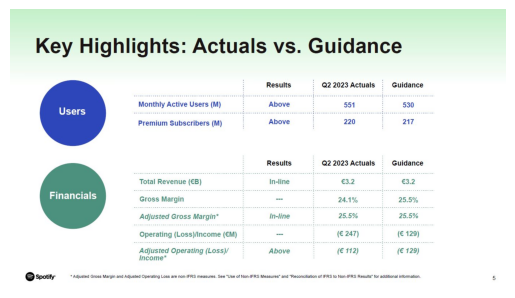

     Column_2      Column_3 Column_4 Column_5  Column_6 Column_7 Column_8
0     Monthly        Active    Users      (M)     Above      551      530
1     Premium   Subscribers      (M)    Above       220      217      NaN
2     Results            02     2023  Actuals  Guidance      NaN      NaN
3       Total       Revenue     (EB)  In-line      83.2     63.2      NaN
4  Financials         Gross   Margin    24.1%     25.5%      NaN      NaN
5    Adjusted         Gross  Margin*  In-line     25.5%    25.5%      NaN
6   Operating  (Loss)Income     (EM)       (€      247)       (€     129)
7    Adjusted     Operating   (Loss)    Above        (€     112)     129)


In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import easyocr

# Load the image
image_path = "image00016.jpg"

# Create an OCR reader object
reader = easyocr.Reader(['en'])  # Specify languages to use (e.g., English)

# Perform OCR on the image
result = reader.readtext(image_path)

# Extract text and calculate spaces
text_with_spaces = []
last_bottom = 0
line_number = 1

# Get image dimensions
img = mpimg.imread(image_path)
img_height = img.shape[0]

for detection in result:
    left, top = detection[0][0]
    right, bottom = detection[0][2]
    detected_text = detection[1]
    
    # Exclude detections too close to the bottom of the image
    if bottom < img_height - 20:  # Adjust this threshold as needed
        # Check if current text is on a new line compared to the previous text
        if top > last_bottom:
            # Append newline and line number
            text_with_spaces.append(f'\nline({line_number}) ')
            line_number += 1
        last_bottom = bottom
        text_with_spaces.append(detected_text)
        text_with_spaces.append(' ')

# Combine text segments with spaces
result_with_spaces = ''.join(text_with_spaces)

# Split the text into lines
lines = result_with_spaces.strip().split("\n")

# Initialize lists to store data
data = []
columns = 0

# Process each line
for line in lines[2:]:
    # Remove "line()" and leading/trailing whitespaces
    line = line.replace("line()", "").strip()
    # Split the line by space
    entries = line.split()
    # Update columns if necessary
    columns = max(columns, len(entries))
    # Add entries to data
    data.append(entries)

# Fill empty entries with NaN
for i in range(len(data)):
    data[i] += [np.nan] * (columns - len(data[i]))

# Create DataFrame
df = pd.DataFrame(data, columns=[f"Column_{i+1}" for i in range(columns)])

# Remove the first column
df = df.iloc[:, 1:]

# Remove the last row and columns 10 to 18
df = df.iloc[:-1, :7]

# Display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  
plt.show()

# Display the DataFrame
print(df)


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


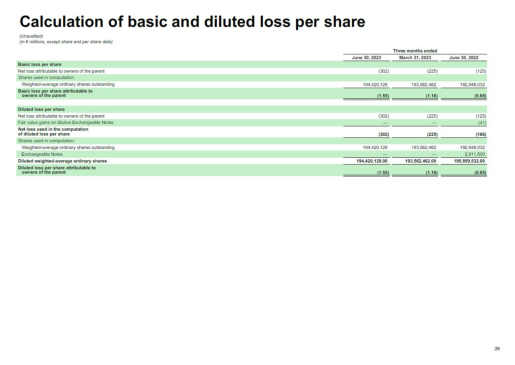

            Column_2          Column_3       Column_4      Column_5  \
0              Thrco            months          ended           NaN   
1               Junc           30.2023          March           31.   
2              Basic              loss            per         share   
3                Net              Icss   atlributable            t0   
4             Shares              used             in  computation:   
5   Weighted-averzge          ordinary         shares   outstanding   
6              Basic              loss            pcr         sharc   
7            Diluted              loss          sharc           NaN   
8                Net              Icss   attributable            to   
9               Fair             value          gains            on   
10               Net              loss           used            in   
11            Shares              used  comiputation:           NaN   
12          Weighted          -averzge       ordinary        shares   
13    

In [11]:
image_path = r"image00045.jpg"
# Create an OCR reader object
reader = easyocr.Reader(['en'])  # Specify languages to use (e.g., English)

# Perform OCR on the image
result = reader.readtext(image_path)

# Extract text and calculate spaces
text_with_spaces = []
last_bottom = 0
line_number = 1
for detection in result:
    left, top = detection[0][0]
    right, bottom = detection[0][2]
    detected_text = detection[1]
    # Check if current text is on a new line compared to the previous text
    if top > last_bottom:
        # Append newline and line number
        text_with_spaces.append(f'\nline({line_number}) ')
        line_number += 1
    last_bottom = bottom
    text_with_spaces.append(detected_text)
    text_with_spaces.append(' ')

# Combine text segments with spaces
result_with_spaces = ''.join(text_with_spaces)

# Print the result
# print(result_with_spaces)
# Split the text into lines
lines = result_with_spaces.strip().split("\n")

# Initialize lists to store data
data = []
columns = 0

# Process each line
for line in lines[2:]:
    # Remove "line()" and leading/trailing whitespaces
    line = line.replace("line()", "").strip()
    # Split the line by space
    entries = line.split()
    # Update columns if necessary
    columns = max(columns, len(entries))
    # Add entries to data
    data.append(entries)

# Fill empty entries with NaN
for i in range(len(data)):
    data[i] += [np.nan] * (columns - len(data[i]))

# Create DataFrame
df = pd.DataFrame(data, columns=[f"Column_{i+1}" for i in range(columns)])

# Remove the first column
df = df.iloc[:, 1:]


# Path to your image file
image_path = r'image00045.jpg'  

# Load the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  
plt.show()

print(df)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


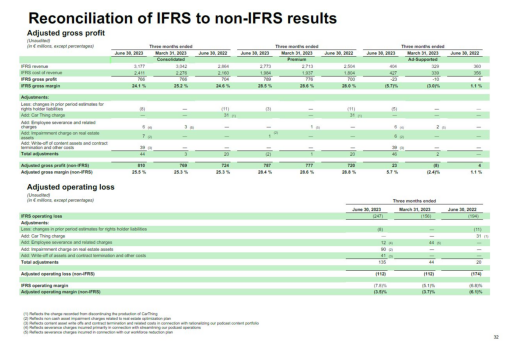

        Column_2     Column_3      Column_4    Column_5   Column_6  Column_7  \
0           June          30,          2023       March        31,      2023   
1   Consolidated      Premium  Ad-Supportcd         NaN        NaN       NaN   
2           IFRS      revenue         3.177       3.042      2.864     2.773   
3           IFRS         cost            of     revenue      2.411     2.276   
4           IFRS        gross        profit         766        766       704   
5           IFRS        gross        margin        24.1          %      25.2   
6   Adjustments:          NaN           NaN         NaN        NaN       NaN   
7          Less:      changes         prior      period  estimates       for   
8            Add          Car         Thing      charge        NaN       NaN   
9           Add-     Employee     severance         and    related   charges   
10           Add   mdarrmment        charge          on       real    estate   
11          Add:    Write-off           

In [12]:
image_path = r"image00047.jpg"
# Create an OCR reader object
reader = easyocr.Reader(['en'])  # Specify languages to use (e.g., English)

# Perform OCR on the image
result = reader.readtext(image_path)

# Extract text and calculate spaces
text_with_spaces = []
last_bottom = 0
line_number = 1
for detection in result:
    left, top = detection[0][0]
    right, bottom = detection[0][2]
    detected_text = detection[1]
    # Check if current text is on a new line compared to the previous text
    if top > last_bottom:
        # Append newline and line number
        text_with_spaces.append(f'\nline({line_number}) ')
        line_number += 1
    last_bottom = bottom
    text_with_spaces.append(detected_text)
    text_with_spaces.append(' ')

# Combine text segments with spaces
result_with_spaces = ''.join(text_with_spaces)

# Print the result
# print(result_with_spaces)
# Split the text into lines
lines = result_with_spaces.strip().split("\n")

# Initialize lists to store data
data = []
columns = 0

# Process each line
for line in lines[2:]:
    # Remove "line()" and leading/trailing whitespaces
    line = line.replace("line()", "").strip()
    # Split the line by space
    entries = line.split()
    # Update columns if necessary
    columns = max(columns, len(entries))
    # Add entries to data
    data.append(entries)

# Fill empty entries with NaN
for i in range(len(data)):
    data[i] += [np.nan] * (columns - len(data[i]))

# Create DataFrame
df = pd.DataFrame(data, columns=[f"Column_{i+1}" for i in range(columns)])

# Remove the first column
df = df.iloc[:, 1:]


# Path to your image file
image_path = r'image00047.jpg'  

# Load the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  
plt.show()

print(df)